Import Libaries

In [ ]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix

import graphviz

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Input Data
df_pokemon = pd.read_csv("/content/pokemon.csv") #reading csv file and save it into a variable
df_pokemon.head(10) #show the first 10 rows in data

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,NotLegendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,NotLegendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,NotLegendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,NotLegendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,NotLegendary
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,NotLegendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,NotLegendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,NotLegendary
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,NotLegendary
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,NotLegendary


We finally know that our data has 12 columns.

Name : Nominal data

Type 1 : Nominal data


Type 2 : Nominal data

Total  : Ratio data

HP  : Ratio data

Attack : Ratio data

Defense : Ratio data

Sp Atk : Ratio data

Sp Def : Ratio data

Speed : Ratio data

Generation : Ordinal data

Legendary : Nominal data

Data Cleaning

I found some unneeded text in Name column. For example, "CharizardMega Charizard X" should be "Mega Charizard X". So we need to remove all characters before "Mega".

In [ ]:
df_pokemon.Name = df_pokemon.Name.str.replace(".*(?=Mega)", "")
df_pokemon.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,NotLegendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,NotLegendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,NotLegendary
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,NotLegendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,NotLegendary
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,NotLegendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,NotLegendary
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,NotLegendary
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,NotLegendary
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,NotLegendary


In [ ]:
df_pokemon_co = df_pokemon.set_index('Name') #change and set the index to the name attribute
df_pokemon_co = df_pokemon.drop(['#'],axis=1) #drop the columns with axis=1; axis=0 is for rows
df_pokemon_co.head()

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,NotLegendary
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,NotLegendary
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,NotLegendary
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,NotLegendary
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,NotLegendary


If we look at row 5, there is a NaN type in the Type 2 row. We can choose to delete or fill in the data. But in this case if we delete rows that has NaN, then it will mess up our data. Then we'll choose to fill it by copying the data from Type 1 column.

In [ ]:
df_pokemon_co['Type2'].fillna(df_pokemon_co['Type1'], inplace=True)
df_pokemon_co.head(10)

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,NotLegendary
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,NotLegendary
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,NotLegendary
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,NotLegendary
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,NotLegendary
5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,NotLegendary
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,NotLegendary
7,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,NotLegendary
8,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,NotLegendary
9,Squirtle,Water,Water,314,44,48,65,50,64,43,1,NotLegendary


Frequency
Now, let's see all unique types in Type 1 and Type 2

In [ ]:
print("Type1:",df_pokemon_co["Type1"].unique(), "=", len(df_pokemon_co["Type1"].unique()))
print("Type2:",df_pokemon_co["Type2"].unique(), "=", len(df_pokemon_co["Type2"].unique()))

Type1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] = 18
Type2: ['Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark'
 'Ghost'] = 18


And we get that there are 18 unique types. Ok, now we use value_counts() to count each unique type in Type 1 * and * Type 2

In [ ]:
print(df_pokemon_co["Type1"].value_counts())
print(df_pokemon_co["Type2"].value_counts())

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type1, dtype: int64
Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: Type2, dtype: int64


We can conclude that the highest frequency in Type 1 is Water and in Type 2 is Flying. On the other hand, the lowest frequency in Type 1 is Flying and in Type 2 is Bug

The Strongest and The Weakest

Who is the strongest and the weakest Pokemons by types? We will find out.

In [ ]:
strongest = df_pokemon_co.sort_values(by='Total', ascending=False) #sorting the rows in descending order
strongest.drop_duplicates(subset=['Type1'],keep='first')
#since the rows are now sorted in descending order
#thus we take the first row for every new type of pokemon i.e the table will check Type 1 of every pokemon
#The first pokemon of that type is the strongest for that type
#so we just keep the first row

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
426,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,Legendary
164,Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,Legendary
422,KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,Legendary
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,Legendary
552,Arceus,Normal,Normal,720,120,120,120,120,120,120,4,Legendary
413,Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,NotLegendary
268,Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,NotLegendary
545,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,Legendary
270,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,Legendary
792,Xerneas,Fairy,Fairy,680,126,131,95,131,98,99,6,Legendary


So, we finally know who is the strongest pokemons by types. And also the strongest of the strongest pokemon is Mega Rayquaza, the Dragon type. And also we know that 10/18 Strongest Pokemons by types are Legendary. Let's check who is the weakest by types

In [ ]:
weakest = df_pokemon_co.sort_values(by='Total') #sorting the rows in ascending order
weakest.drop_duplicates(subset=['Type1'],keep='first')

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
206,Sunkern,Grass,Grass,180,30,30,30,30,30,30,2,NotLegendary
322,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,NotLegendary
446,Kricketot,Bug,Bug,194,37,25,41,25,41,25,4,NotLegendary
303,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,NotLegendary
139,Magikarp,Water,Water,200,20,10,55,15,20,80,1,NotLegendary
186,Pichu,Electric,Electric,205,20,40,15,35,35,60,2,NotLegendary
255,Tyrogue,Fighting,Fighting,210,35,35,35,35,35,35,2,NotLegendary
187,Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,NotLegendary
284,Poochyena,Dark,Dark,220,35,55,35,30,30,35,3,NotLegendary
46,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,NotLegendary


We finally know who is the weakest pokemons by types. The weakest of the weakest pokemon is Sunkern, the Grass type. We can't find the Legendary category here.

The Fastest and The Slowest

Now, who is the fastest and the slowest Pokemons by types?

In [ ]:
fastest = df_pokemon_co.sort_values(by='Speed', ascending=False) #sorting the rows in descending order
fastest.drop_duplicates(subset=['Type1'],keep='first')

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
431,DeoxysSpeed Forme,Psychic,Psychic,600,50,95,90,95,90,180,3,Legendary
315,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,NotLegendary
154,Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,NotLegendary
275,Mega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,NotLegendary
109,Electrode,Electric,Electric,480,60,50,70,80,80,140,1,NotLegendary
476,Mega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,NotLegendary
183,Crobat,Poison,Flying,535,85,90,80,70,80,130,2,NotLegendary
102,Mega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,NotLegendary
731,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,NotLegendary
549,Darkrai,Dark,Dark,600,70,90,90,135,90,125,4,Legendary


The Fastest pokemon is DeoxysSpeed Forme which is a Legendary Psychic pokemon.

In [ ]:
slowest = df_pokemon_co.sort_values(by='Speed') #sorting the rows in ascending order
slowest.drop_duplicates(subset=['Type1'],keep='first')

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
495,Munchlax,Normal,Normal,390,135,85,40,40,85,5,4,NotLegendary
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,NotLegendary
658,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,NotLegendary
486,Bonsly,Rock,Rock,290,50,80,95,10,45,10,4,NotLegendary
359,Trapinch,Ground,Ground,290,45,100,45,45,45,10,3,NotLegendary
209,Wooper,Water,Ground,210,55,45,45,25,25,15,2,NotLegendary
187,Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,NotLegendary
668,Litwick,Ghost,Fire,275,50,30,55,65,55,20,5,NotLegendary
355,Torkoal,Fire,Fire,470,70,85,140,85,70,20,3,NotLegendary
327,Mega Sableye,Dark,Ghost,480,50,85,125,85,115,20,3,NotLegendary


This data shows that Bug type and Normal type have slowest pokemon compared other types.

summary

In [ ]:
#now, let's summary the data
df_pokemon_co.describe()

,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Data Visualisation

And now we move to the important part where we will get informations from visualizing our data. First, we make count plots to see value counts for each type



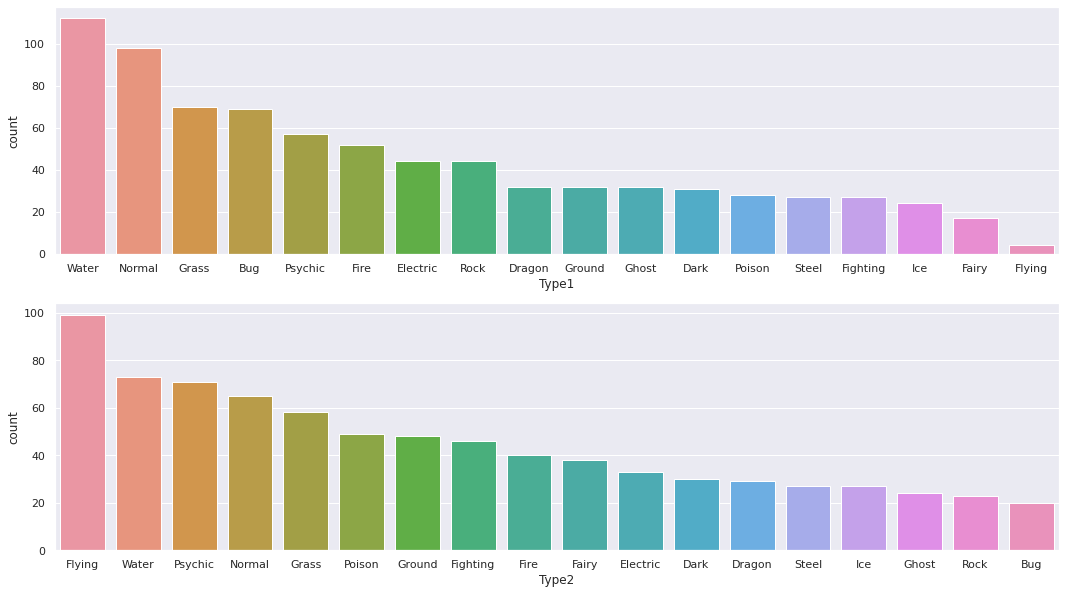

In [ ]:
#count plot
sns.set(style = 'darkgrid')
f, ax = plt.subplots(2,1, figsize = (18,10)) #making 2 count plots 

sns.countplot(x = 'Type1', data = df_pokemon_co, order = df_pokemon_co['Type1'].value_counts().index ,ax = ax[0])
sns.countplot(x = 'Type2', data = df_pokemon_co, order = df_pokemon_co['Type2'].value_counts().index ,ax = ax[1])

plt.show()

Percentages for each type

How about percentages for each type? We can make a pie plot to get informations about that. But before that we must to count all pokemon types from both columns and avoid double counting, because we copied the elements in the Type 1 column to the Type 2 column before. Why we do this? Because there are pokemon that don't have Type 2.

In [ ]:
#we create a dictionary to make process easier
types_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0, 'Flying' : 0}

type1 = df_pokemon_co["Type1"]
type2 = df_pokemon_co["Type2"]

for i in range(len(type1)):
    
    #first, count the Type 1 column
    types_count[type1[i]] += 1
    
    #now we count the Type 2 column and avoid double counting
    if type1[i] != type2[i]:
        types_count[type2[i]] += 1

for t in types_count:
    print("{:10} = {}".format(t,types_count[t]))

Grass      = 95
Fire       = 64
Water      = 126
Bug        = 72
Normal     = 102
Poison     = 62
Electric   = 50
Ground     = 67
Fairy      = 40
Fighting   = 53
Psychic    = 90
Rock       = 58
Ghost      = 46
Ice        = 38
Dragon     = 50
Dark       = 51
Steel      = 49
Flying     = 101


We got overall count from both types, now it's time to get Type 1 count and Type 2 count.

In [ ]:
type1_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0,
               'Flying' : 0}
type2_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0,
               'Flying' : 0}

for i in range(len(type1)):
    type1_count[type1[i]] += 1
    type2_count[type2[i]] += 1

print("TYPE 1")
for t in type1_count:
    print("{:10} = {}".format(t,type1_count[t]))
print("-------------------")
print("TYPE 2")
for t in type2_count:
    print("{:10} = {}".format(t,type2_count[t]))

TYPE 1
Grass      = 70
Fire       = 52
Water      = 112
Bug        = 69
Normal     = 98
Poison     = 28
Electric   = 44
Ground     = 32
Fairy      = 17
Fighting   = 27
Psychic    = 57
Rock       = 44
Ghost      = 32
Ice        = 24
Dragon     = 32
Dark       = 31
Steel      = 27
Flying     = 4
-------------------
TYPE 2
Grass      = 58
Fire       = 40
Water      = 73
Bug        = 20
Normal     = 65
Poison     = 49
Electric   = 33
Ground     = 48
Fairy      = 38
Fighting   = 46
Psychic    = 71
Rock       = 23
Ghost      = 24
Ice        = 27
Dragon     = 29
Dark       = 30
Steel      = 27
Flying     = 99


Yes! Now finally we can make the pie plot. We'll make 3 pie plots: Type 1 count, Type 2 count. and overall count

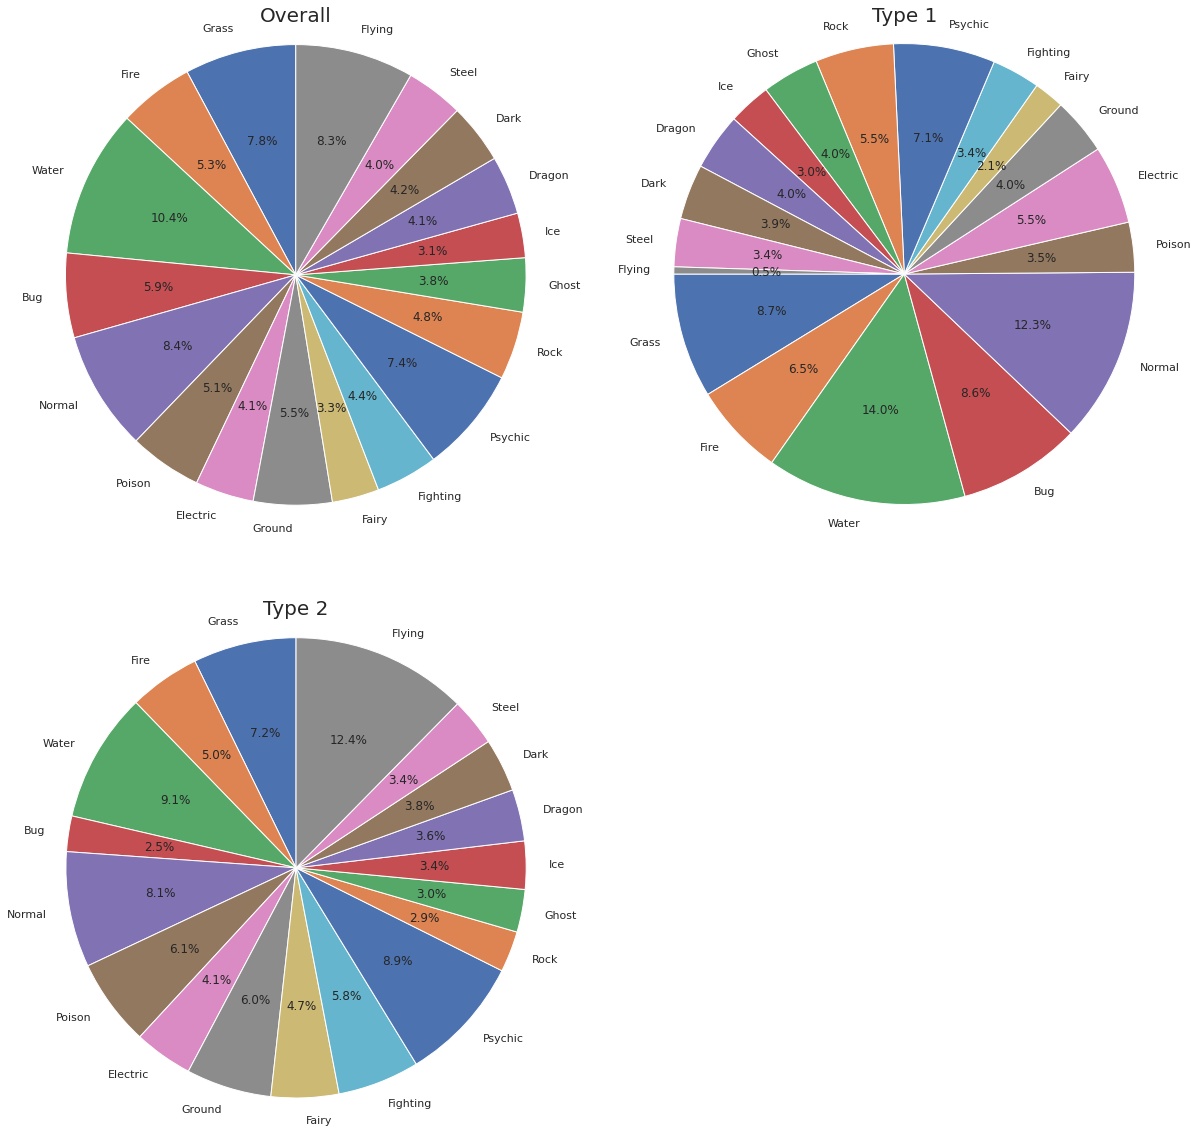

In [ ]:
f, axs = plt.subplots(2,2, figsize=(20,20))

labels ='Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', \
        'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost' ,'Ice' ,'Dragon' ,'Dark' , \
        'Steel','Flying'
    
size0 = [95,64,126,72,102,62,50,67,40,53,90,58,46,38,50,51,49,101] #overall count
size1 = [70,52,112,69,98,28,44,32,17,27,57,44,32,24,32,31,27,4] #Type 1 count
size2 = [58,40,73,20,65,49,33,48,38,46,71,23,24,27,29,30,27,99] #Type 2 count

#Overall pie
axs[0,0].pie(size0, labels = labels, autopct='%1.1f%%' ,startangle = 90)
axs[0,0].axis("equal")
axs[0,0].set_title("Overall", size = 20)

#Type1 pie
axs[0,1].pie(size1, labels = labels, autopct='%1.1f%%' ,startangle = 180)
axs[0,1].axis("equal")
axs[0,1].set_title("Type 1", size = 20)

#Type2 pie
axs[1,0].pie(size2, labels = labels, autopct='%1.1f%%' ,startangle = 90)
axs[1,0].axis("equal")
axs[1,0].set_title("Type 2", size = 20)

f.delaxes(axs[1,1]) #deleting axs[1,1] so it will be white blank
plt.show()

All stats analysis of the pokemons

let's analyze all ratio data.



In [ ]:
df_pokemon_new = df_pokemon_co.drop(['Generation', 'Total', 'Legendary'], axis = 1) #we drop some columns that unnecessary
df_pokemon_new.head()

,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,Fire,39,52,43,60,50,65


Take a look at the data. We can conclude that the Dragon type pokemon has an advantage over other types because they have a higher attack compared to other types. Let's see the starter pokemon : Fire, Water, and Grass. Fire Pokemons have a higher attack than Water and Grass. So it's very recommended to use it for attacking opponent for every beginner trainer. (If you ever played pokemon, then u can understand what starter pokemon is)

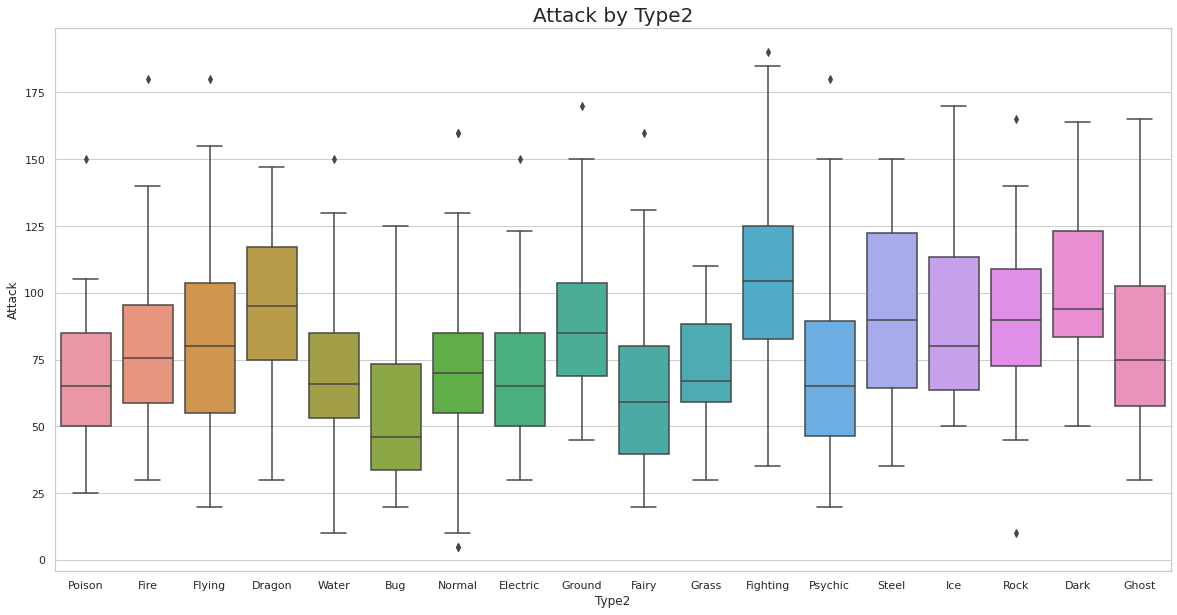

In [ ]:
#stats for the Attack by Type 2
f, ax = plt.subplots(1,1, figsize = (20,10))

ax = sns.boxplot(data = df_pokemon_new, x = 'Type2', y = 'Attack')
ax.set_title(label='Attack by Type2', size = 20)

plt.show()

And from this chart, we can conclude that Fighting pokemon have a higher attack than other pokemon types. All pokemons that have Fighting as their second type have higher attack value

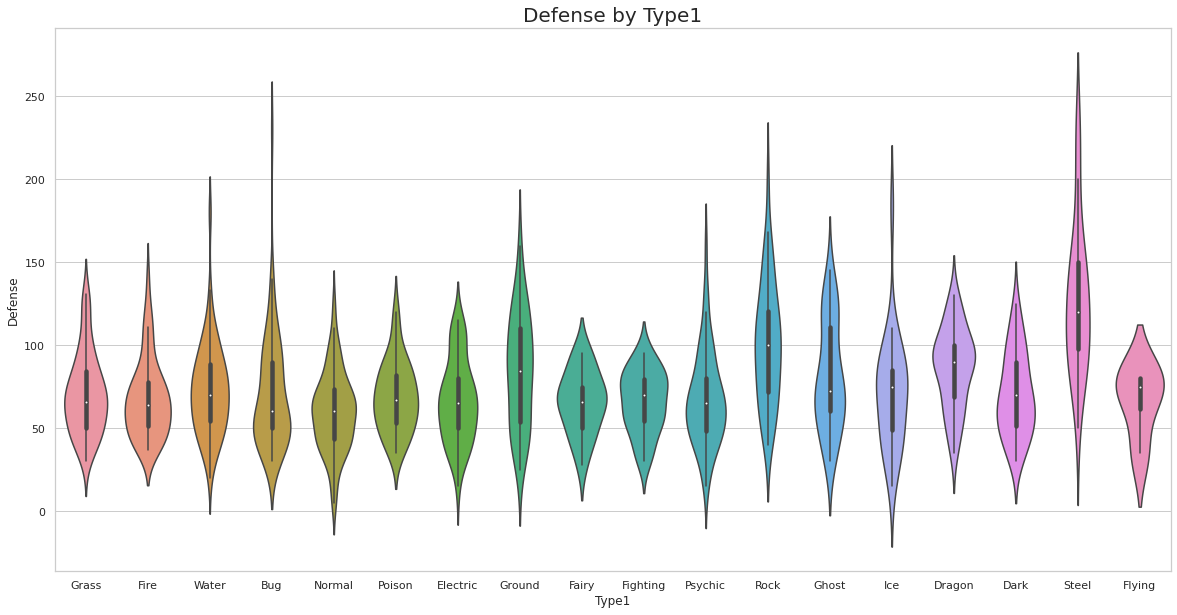

In [ ]:
#stats for the Defense by Type 1
f, ax = plt.subplots(1,1, figsize = (20,10))

ax = sns.violinplot(data = df_pokemon_new, x = 'Type1', y = 'Defense')
ax.set_title(label='Defense by Type1', size = 20)

plt.show()

This shows that *Steel * pokemon have the highest defense compared the other types

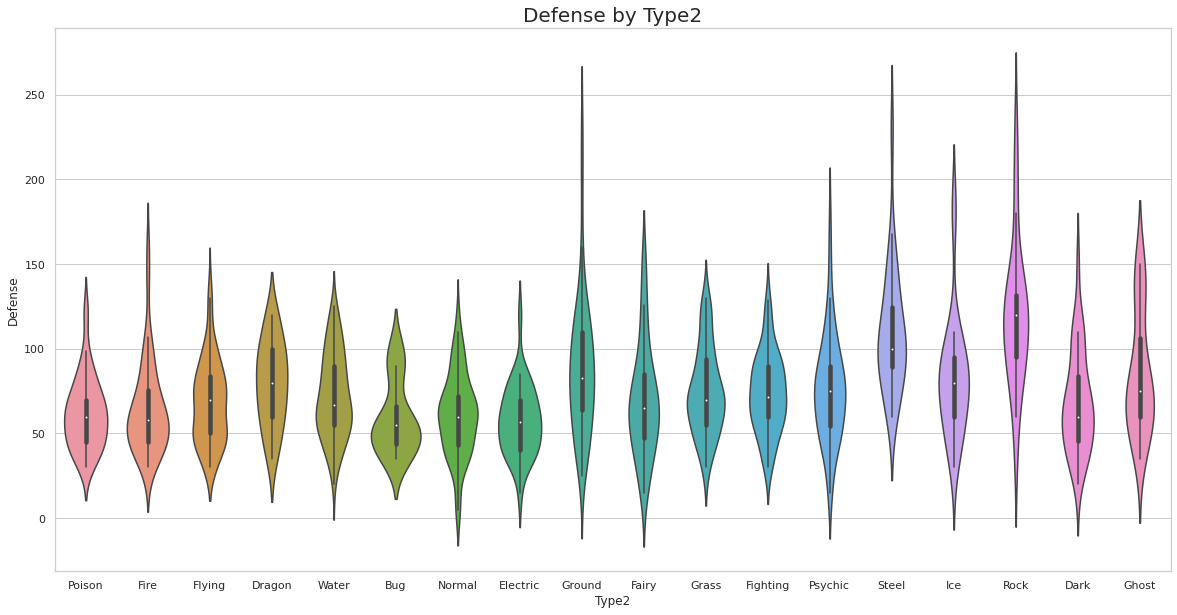

In [ ]:
#stats for the Defense by Type 2
f, ax = plt.subplots(1,1, figsize = (20,10))

ax = sns.violinplot(data = df_pokemon_new, x = 'Type2', y = 'Defense')
ax.set_title(label='Defense by Type2', size = 20)

plt.show()

And this shows that Rock pokemon is better than** Steel** pokemon in Defense values.

# Strongest Generation

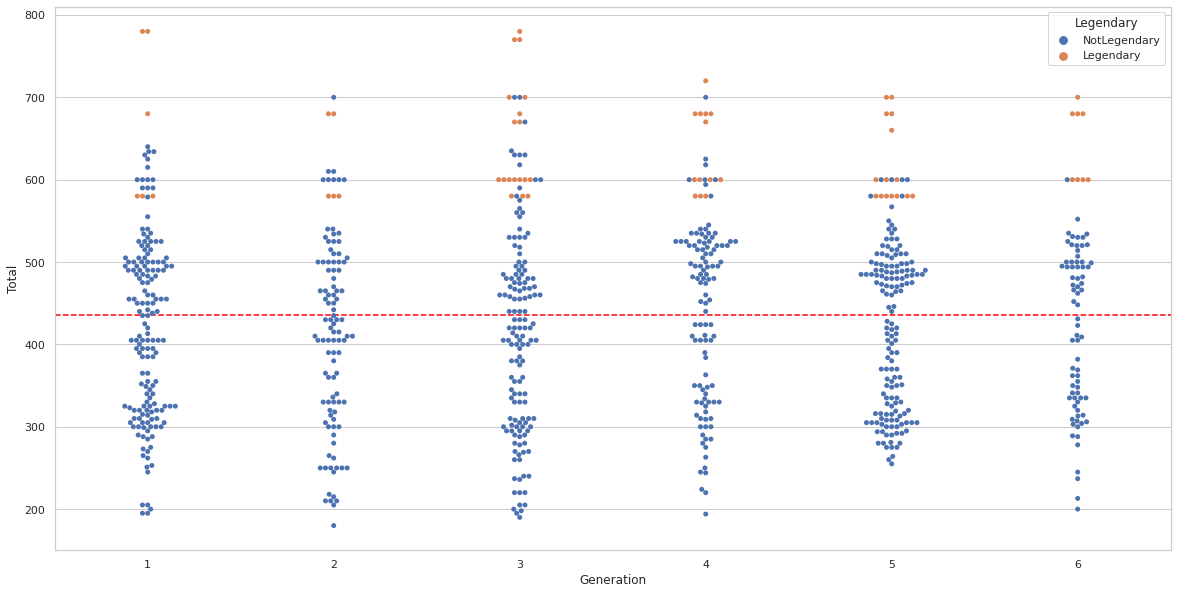

In [ ]:
f, ax = plt.subplots(0,0, figsize = (20,10))
ax = sns.swarmplot(data = df_pokemon_co, x = 'Generation', y= 'Total', hue = 'Legendary')

plt.axhline(df_pokemon_co['Total'].mean(), color = 'red', linestyle = 'dashed') #giving a straight line on mean

plt.show()

This shows that 3rd generation has many strong pokemons. And also this data informed that all Legendary pokemon are strong or even the strongest.

# How many Legendary Pokemons are there?

In [ ]:
legendary_count = df_pokemon_co[['Legendary']].groupby('Legendary').size().reset_index(name="Total")
legendary_count['% Total'] = (legendary_count['Total'] / sum(legendary_count['Total'])) * 100
legendary_count

,Legendary,Total,% Total
0,Legendary,65,8.125
1,NotLegendary,735,91.875


In [ ]:
colors = ['#0d1137', '#e52165']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])


fig.add_trace(go.Bar(x=legendary_count['Legendary'],
                     y=legendary_count['Total'],
                     marker_color=colors,
                     ),
              row=1, col=1)

fig.add_trace(go.Pie(labels=legendary_count['Legendary'], values=legendary_count['Total'],
                     marker_colors=colors,
                     name='Percentage Count'),
              row=1, col=2)

fig.update_layout(title_text='Non-Legendary and Legendary Pokemons',
                  template='plotly_white')
fig.update_xaxes(title_text='Legendary')
fig.update_yaxes(title_text='Total Pokemons')

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.update_layout(showlegend=False)

fig.show()

Legendary Pokemon by Attack and Defense

We now know that there are 70 legendary Pokémon – a sizable minority at 9% of the population! Let's start to explore some of their distinguishing characteristics.

First of all, we'll plot the relationship between height_m and weight_kg for all 801 Pokémon, highlighting those that are classified as legendary. We'll also add conditional labels to the plot, which will only print a Pokémon's name if it is taller than 7.5m or heavier than 600kg.

In [ ]:
X = df_pokemon_co['Defense'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df_pokemon_co['Attack'])

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

colors = ['#aed6dc', '#ff9a8d']

fig = px.scatter(df_pokemon_co, x='Defense', y='Attack', color='Legendary',
                 color_discrete_sequence=colors,
                 hover_name="Name",
                 template='plotly_white',
                 title="Attack Vs Defense")
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit',
                          marker=dict(color='#4a536b')))

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.show()


Legendary Pokémon by type

It seems that legendary Pokémon are generally have higher attack and defense, but with many exceptions. For example, Rampardos , Aggron and Shuckle hve extreme attack or defense, but none of them have legendary status. There must be other factors at play.

We will now look at the effect of a Pokémon's type on its legendary/non-legendary classification. There are 18 possible types, ranging from the common (Grass / Normal / Water) to the rare (Fairy / Flying / Ice). We will calculate the proportion of legendary Pokémon within each category and then plot these proportions using a simple bar chart

In [ ]:
legend_by_type = df_pokemon_co[['Type1', 'Legendary']]
legend_by_type['Legendary'] = legend_by_type['Legendary']
legend_by_type = legend_by_type.groupby('Type1').sum().reset_index().sort_values(['Legendary'])


legend_by_type2 = df_pokemon_co[['Type2', 'Legendary']]
legend_by_type2['Legendary'] = legend_by_type2['Legendary']
legend_by_type2 = legend_by_type2.groupby('Type2').sum().reset_index().sort_values(['Legendary'])


# Plotting Bar plots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "bar"}]],
                    subplot_titles=("Primary Type", "Secondary Type"))

fig.add_trace(go.Bar(x=legend_by_type['Legendary'],
                     y=legend_by_type['Type1'],
                     name='Type1',
                     orientation='h',
                     marker_color="#408ec6",
                     ),
              row=1, col=1)

fig.add_trace(go.Bar(x=legend_by_type2['Legendary'],
                     y=legend_by_type2['Type2'],
                     name='Type2',
                     orientation='h',
                     marker_color="#7a2048"
                     ),
              row=1, col=2)

fig.update_layout(title_text='Legendary Pokemon by Type',
                  template='plotly_white')
fig.update_xaxes(title_text='Total Legendaries')
fig.update_yaxes(title_text='Types')

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.update_layout(showlegend=False)

fig.show()

There are clear differences between Pokémon types in their relation to legendary status. While most Legendary are of flying, dragon and psychic type, there is no such thing as a legendary poison, bug or fighting Pokémon.



# Finding any correlation

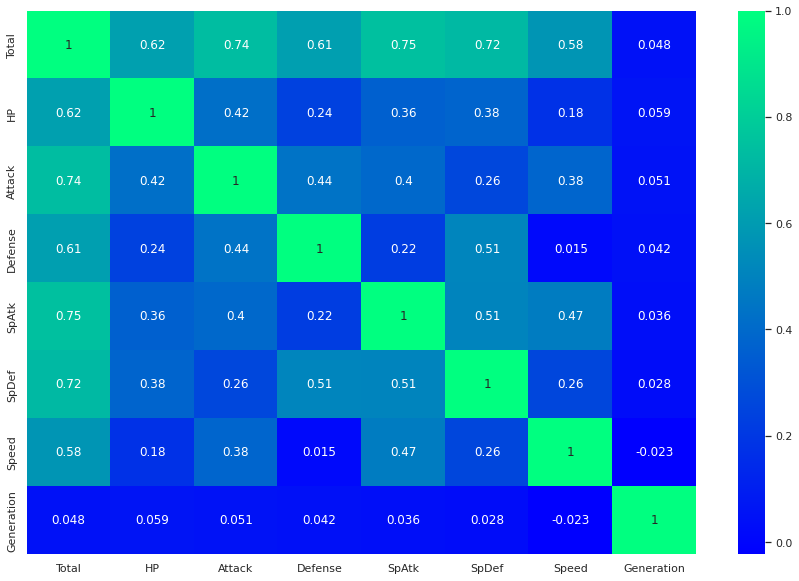

In [ ]:
f, ax = plt.subplots(0,0,figsize=(15,10))
ax = sns.heatmap(df_pokemon_co.corr(), annot = True, cmap = 'winter') #data.corr() used to make correlation matrix

plt.show()

From the heat map above, the correlation between the attributes of the pokemon is not to much. The highest correlation is Sp. Attack and Total, following Attack *with *Total *and *Sp. Defense and Total.